In [4]:
2982 * 0.9

2683.8

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

from tqdm import tqdm

plt.rcParams.update({
    'mathtext.fontset': 'cm',
    'font.family': 'STIXGeneral',
    'axes.xmargin': 0,
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'axes.labelsize': 14,
    "axes.titlesize": 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlepad': 20
})

In [2]:
features = pd.read_csv("../features_tweaked.csv")


C:\Users\scbui\AppData\Local\Temp\ipykernel_24176\2534224213.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_csv("../features_tweaked.csv")


In [21]:
metadata_columns = ['Respondent', 'Participant_ID', 'mean_rating', 'Participant_ID_short',
       'image_number', 'individual_ratings', 'ID', 'Type', "class", "Missing"]

X = features.drop(metadata_columns, axis = 1)
y = features["individual_ratings"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_model(_X, _y, _lr): #Function to train a model based on X, y and learning rate

    n = _X.shape[1]

    model = keras.models.Sequential()
    model.add(Dense(n, input_shape = _X.shape[1:], activation="relu"))
    model.add(Dense(300, activation="relu"))
    model.add(Dense(200, activation="relu")) # less layers seem to work a bit better...
    model.add(Dense(100, activation="relu"))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(1))

    opt = Adam(learning_rate = _lr) # 1e-4 works for adam 
    model.compile(loss="mean_squared_error", optimizer=opt)
    
    #by fitting the model, the Tensorflow 'object' is adjusted, so the model is adjusted without actually defining it again
    history = model.fit(_X, _y, epochs = 80, validation_split = 0.1, verbose = 0)

    return model, history

### Example of how classes work

In [16]:
class car:
    def __init__(self):
        has_started = False
        pass

    def start(self):
        self.has_started = True
        return 5

car = car()
start_data = car.start()

print(start_data)

5


In [22]:

RMSEs = []
stds = []
print("test")
learning_rates = np.logspace(-2, -5, 10) #return these numbers based on a log scale

for lr in tqdm(learning_rates):
    print(f"Training model for $\lr = {lr}$")
    temp_RMSEs = []

    for i in range(1): #Each model is trained x times

        _m, history = train_model(X_train_scaled, y_train, lr)

        performance = np.sqrt(np.mean((_m.predict(X_test_scaled[0:]).flatten() - np.array(y_test))**2))

        
        temp_RMSEs.append(performance)
    print(f"Temp_RMSE = {temp_RMSEs}")

    RMSEs.append(np.mean(temp_RMSEs))
    stds.append(np.std(temp_RMSEs))

print(f"Model total performance: {RMSEs} +- {stds}")


test


  0%|          | 0/10 [00:00<?, ?it/s]

Training model for $\lr = 0.01$
10/10 [==============================] - 0s 8ms/step


 10%|█         | 1/10 [05:10<46:36, 310.73s/it]

Temp_RMSE = [1.9447156988959147]
Training model for $\lr = 0.004641588833612777$
10/10 [==============================] - 0s 8ms/step


 20%|██        | 2/10 [12:09<49:54, 374.28s/it]

Temp_RMSE = [2.3043325994782498]
Training model for $\lr = 0.0021544346900318843$
10/10 [==============================] - 0s 9ms/step


 30%|███       | 3/10 [18:59<45:33, 390.47s/it]

Temp_RMSE = [2.442506586723827]
Training model for $\lr = 0.001$
10/10 [==============================] - 0s 11ms/step


 40%|████      | 4/10 [25:31<39:06, 391.00s/it]

Temp_RMSE = [2.632451737066357]
Training model for $\lr = 0.0004641588833612782$
10/10 [==============================] - 0s 6ms/step


 50%|█████     | 5/10 [31:28<31:34, 378.85s/it]

Temp_RMSE = [2.924830856270943]
Training model for $\lr = 0.00021544346900318845$
10/10 [==============================] - 0s 9ms/step


 60%|██████    | 6/10 [38:08<25:45, 386.25s/it]

Temp_RMSE = [2.9835482997751055]
Training model for $\lr = 0.0001$
10/10 [==============================] - 0s 14ms/step


 70%|███████   | 7/10 [44:33<19:16, 385.58s/it]

Temp_RMSE = [2.7573280789627272]
Training model for $\lr = 4.641588833612782e-05$
10/10 [==============================] - 0s 6ms/step


 80%|████████  | 8/10 [50:19<12:26, 373.02s/it]

Temp_RMSE = [3.543708936630171]
Training model for $\lr = 2.1544346900318867e-05$
10/10 [==============================] - 0s 4ms/step


 90%|█████████ | 9/10 [54:54<05:42, 342.57s/it]

Temp_RMSE = [3.952783515242412]
Training model for $\lr = 1e-05$
10/10 [==============================] - 0s 3ms/step


100%|██████████| 10/10 [58:33<00:00, 351.33s/it]

Temp_RMSE = [3.7779662289190266]
Model total performance: [1.9447156988959147, 2.3043325994782498, 2.442506586723827, 2.632451737066357, 2.924830856270943, 2.9835482997751055, 2.7573280789627272, 3.543708936630171, 3.952783515242412, 3.7779662289190266] +- [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [23]:
# np.save("lr_min2_min5_epochs.npy", learning_rates)
# np.save("lr_min2_min5_RSME.npy", RMSEs)
# np.save("lr_min2_min5_STD.npy", stds)

<Figure size 640x480 with 0 Axes>

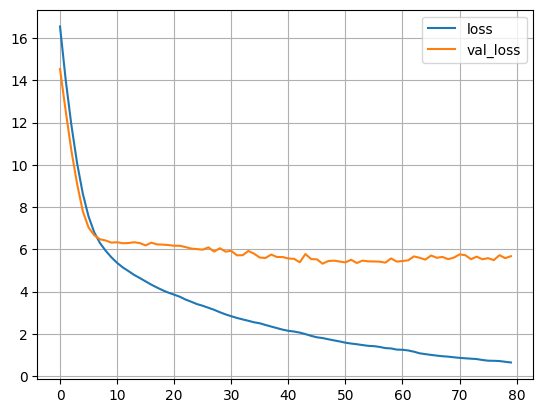

In [29]:
plt.figure()
pd.DataFrame(history.history).plot()
# plt.ylim(2, 10)
# plt.xlim(0, 10)

plt.grid()
plt.show()

# Load data

In [2]:
learning_rates = np.load("lr_min2_min5_epochs.npy") #right plot
RMSEs = np.load("lr_min2_min5_RSME.npy")
stds = np.load("lr_min2_min5_STD.npy")

learning_rates1 = np.load("lr_sweep_tweaked_epochs.npy") #left plot
RMSEs1 = np.load("lr_sweep_tweaked_RSME.npy")
stds1 = np.load("lr_sweep_tweaked_STD.npy")


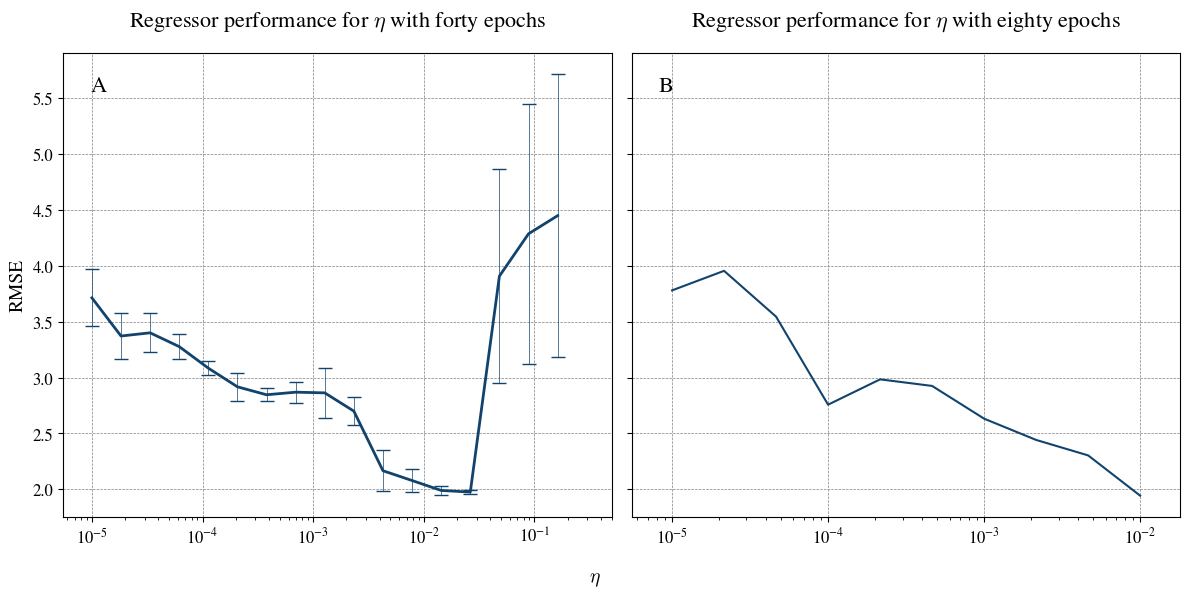

In [3]:

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(learning_rates1, RMSEs1, marker='', color='#12436D', linewidth=2)
axs[0].errorbar(learning_rates1, RMSEs1, stds1, fmt='none', capsize=5, color='#12436D', linewidth=0.5)

axs[0].set_title("Regressor performance for $\eta$ with forty epochs")
axs[0].set_xscale("log")
axs[0].set_ylabel("RMSE")
axs[0].set_xlim(0.0000055, 0.5)
axs[0].grid(True)

axs[1].errorbar(learning_rates, RMSEs, stds, color="#12436D")
axs[1].set_title("Regressor performance for $\eta$ with eighty epochs")
axs[1].set_xscale("log")
axs[1].set_xlim(0.0000055, 0.018)
axs[1].grid(True)

# Add annotations 'A' and 'B' in the upper left corner of each subplot
axs[0].text(0.05, 0.95, 'A', transform=axs[0].transAxes, fontsize=16, va='top', ha='left')
axs[1].text(0.05, 0.95, 'B', transform=axs[1].transAxes, fontsize=16, va='top', ha='left')

fig.supxlabel("$\eta$", fontsize = 14)
# Adjust layout
plt.tight_layout()

# Save and show the plot
plt.savefig("../subplots_lr.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [9]:
RMSEs

array([1.9447157 , 2.3043326 , 2.44250659, 2.63245174, 2.92483086,
       2.9835483 , 2.75732808, 3.54370894, 3.95278352, 3.77796623])